# Using Machine Learning to determine photometric redshift

Lecture given by Miguel Angel Aragon, del Instituto de Astronomia de la UNAM, sede de Ensenada.


This Notebook can be run in Google Colab, where all the needed libbraries are already installed.
You can use the CPU or GPU configuration, it almost takes the same time to run.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

Download the data from the github repository

In [2]:
#- redshift, photo-z, m_u, m_g, m_r, m_i, m_z, petro50, petro90
try:
  sdss = np.load('DR9_photo-z-small.npy')
except:
  ! wget https://github.com/Morisset/Python-lectures-Notebooks/raw/master/Notebooks/DR9_photo-z-small.npy
  sdss = np.load('DR9_photo-z-small.npy')

--2021-01-22 18:51:14--  https://github.com/Morisset/Python-lectures-Notebooks/raw/master/Notebooks/DR9_photo-z-small.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Morisset/Python-lectures-Notebooks/master/Notebooks/DR9_photo-z-small.npy [following]
--2021-01-22 18:51:15--  https://raw.githubusercontent.com/Morisset/Python-lectures-Notebooks/master/Notebooks/DR9_photo-z-small.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3600128 (3.4M) [application/octet-stream]
Saving to: ‘DR9_photo-z-small.npy’

DR9_photo-z-small.n 100%[===================>]   3.43M  --.-KB/s    in 0.04s   

2021-01-22 

In [3]:
# Shape of the data
sdss.shape

(100000, 9)

In [4]:
sdss[0]

array([ 0.39964026,  0.344148  , 25.683548  , 20.814222  , 19.111876  ,
       18.458895  , 18.351385  ,  2.3227189 ,  5.778584  ], dtype=float32)

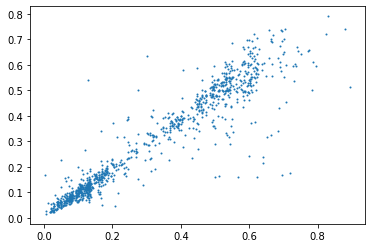

In [5]:
plt.scatter(sdss[0:1000,0], sdss[0:1000, 1], s=1);

Put the data in a pandas DataFrame

In [6]:
sdss_df = pd.DataFrame(sdss, columns=('redshift', 'photo-z', 'm_u', 'm_g', 'm_r', 'm_i', 'm_z', 'petro50', 'petro90'))
# Adding log, more efficient to determine redshift
sdss_df['log_petro50'] = np.log10(sdss_df['petro50'])
sdss_df['log_petro90'] = np.log10(sdss_df['petro90'])

# Selection of the used columns
X_columns = ['m_u', 
             'm_g', 
             'm_r', 
             'm_i', 
             'm_z', 
#             'petro50', 
             'log_petro90']
             
y_columns = ['redshift']

# Split the data set into training and testing
train = sdss_df.sample(frac=0.9, random_state=32) #random state is a seed value
test = sdss_df.drop(train.index)

X_train = train[X_columns]
y_train = train[y_columns]

X_test = test[X_columns]
y_test = test[y_columns]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

n_X = X_train.shape[1]

(90000, 6) (90000, 1) (10000, 6) (10000, 1)


Compare the redshift and the photo-z columns:

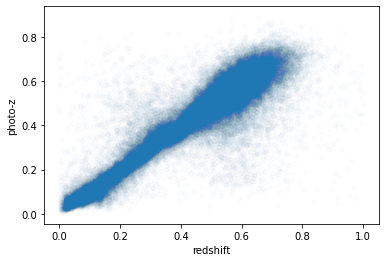

In [7]:
sdss_df.plot.scatter('redshift', 'photo-z', alpha=0.01);

Build the Artificial Neuron Network

In [8]:
model = Sequential()

model.add(Dense(8, input_dim=n_X, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 56        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


Train the Neuron Network

In [9]:
model.fit(X_train, y_train, epochs=20, batch_size=10, verbose=1)

Epoch 1/20
9000/9000 [==============================] - 15s 1ms/step - loss: 11.4484 - mse: 11.4484
Epoch 2/20
9000/9000 [==============================] - 13s 1ms/step - loss: 0.0229 - mse: 0.0229
Epoch 3/20
9000/9000 [==============================] - 13s 1ms/step - loss: 0.0092 - mse: 0.0092
Epoch 4/20
9000/9000 [==============================] - 13s 1ms/step - loss: 0.0077 - mse: 0.0077
Epoch 5/20
9000/9000 [==============================] - 13s 1ms/step - loss: 0.0072 - mse: 0.0072
Epoch 6/20
9000/9000 [==============================] - 13s 1ms/step - loss: 0.0068 - mse: 0.0068
Epoch 7/20
9000/9000 [==============================] - 13s 1ms/step - loss: 0.0066 - mse: 0.0066
Epoch 8/20
9000/9000 [==============================] - 13s 1ms/step - loss: 0.0063 - mse: 0.0063
Epoch 9/20
9000/9000 [==============================] - 13s 1ms/step - loss: 0.0060 - mse: 0.0060
Epoch 10/20
9000/9000 [==============================] - 13s 1ms/step - loss: 0.0058 - mse: 0.0058
Epoch 11/20
9000/

NameError: ignored

Predict the redshift for the test set

In [10]:
y_pred = model.predict(X_test)

Compare predictions with "real" values from the test set

redshift    0.069595
dtype: float32


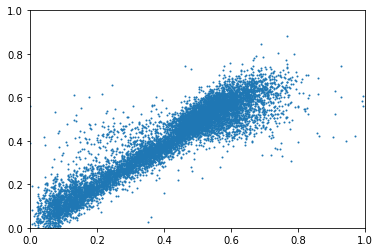

In [11]:
f, ax = plt.subplots()
ax.scatter(y_test, y_pred, s=1)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
print(np.std(y_test - y_pred))